##Lee la ruta de google

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


#Extrae los documentos del zip

In [2]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Análisis de imagenes/Brain Tumor Data Set.zip"  # Cambia esto por el nombre del archivo
extract_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Análisis de imagenes/"  # Opcional: cambia esto si quieres extraer en una ruta específica

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Archivos extraídos en:", os.listdir(extract_path))


Archivos extraídos en: ['Tarea 4 Análisis de Imagenes.ipynb', 'Brain Tumor Data Set.zip', 'Brain Tumor Data Set']


#Imagen

Archivos extraídos: ['Cancer (1).jpg', 'Cancer (1).png', 'Cancer (1).tif', 'Cancer (10).jpg', 'Cancer (10).tif', 'Cancer (100).jpg', 'Cancer (1000).jpg', 'Cancer (1001).jpg', 'Cancer (1002).JPG', 'Cancer (1003).jpg', 'Cancer (1004).jpg', 'Cancer (1005).jpg', 'Cancer (1006).jpg', 'Cancer (1007).jpg', 'Cancer (1008).jpg', 'Cancer (1009).jpg', 'Cancer (101).jpg', 'Cancer (1010).jpg', 'Cancer (1011).jpg', 'Cancer (1012).JPG', 'Cancer (1013).JPG', 'Cancer (1014).jpg', 'Cancer (1015).jpg', 'Cancer (1016).JPG', 'Cancer (1017).jpg', 'Cancer (1018).jpg', 'Cancer (1019).jpg', 'Cancer (102).jpg', 'Cancer (1020).jpg', 'Cancer (1021).jpg', 'Cancer (1022).jpg', 'Cancer (1023).jpg', 'Cancer (1024).JPG', 'Cancer (1025).JPG', 'Cancer (1026).JPG', 'Cancer (1027).JPG', 'Cancer (1028).jpg', 'Cancer (1029).jpg', 'Cancer (103).jpg', 'Cancer (1030).jpg', 'Cancer (1031).jpg', 'Cancer (1032).jpg', 'Cancer (1033).jpg', 'Cancer (1034).jpg', 'Cancer (1035).jpg', 'Cancer (1036).JPG', 'Cancer (1037).jpg', 'Cancer (

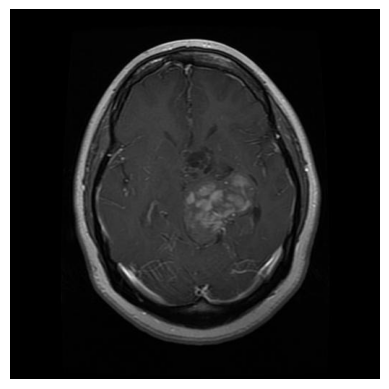

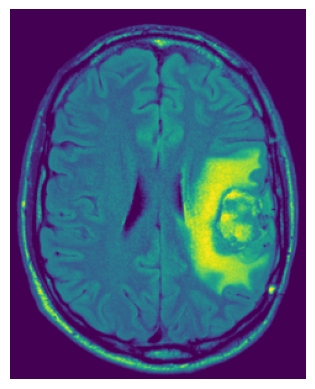

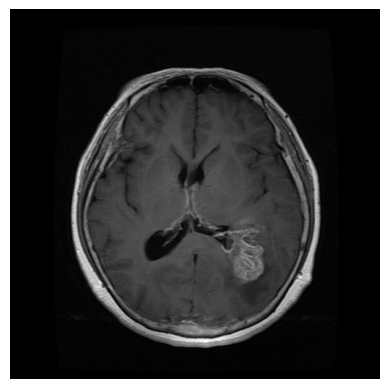

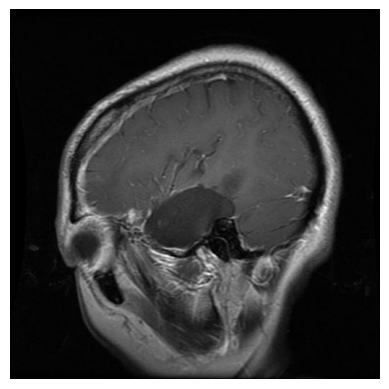

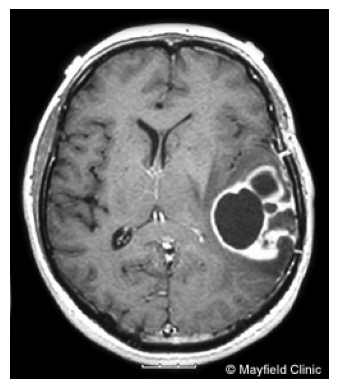

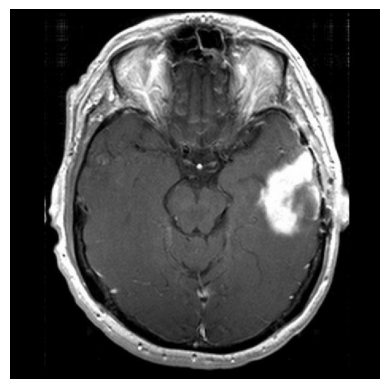

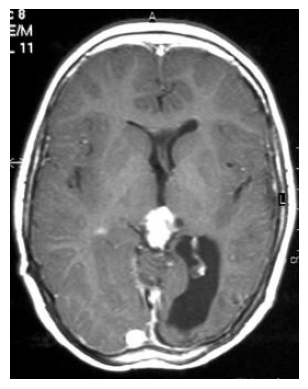

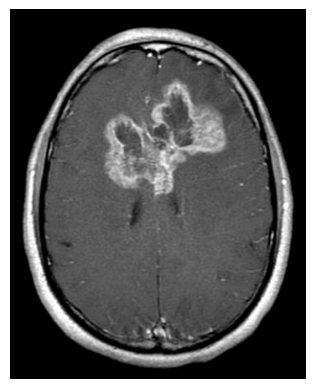

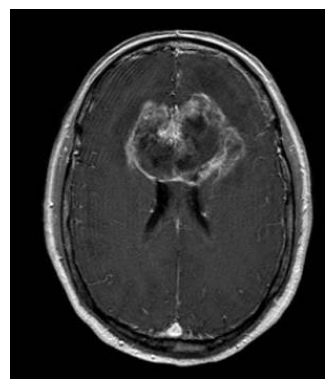

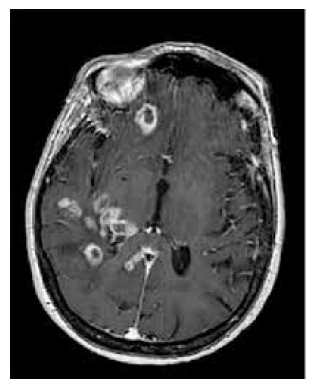

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

extract_path = "/content/drive/MyDrive/Leslye/Escuela/MCD/PCD/Análisis de imagenes/Brain Tumor Data Set/Brain Tumor"
# Ver los archivos extraídos
archivos = os.listdir(extract_path)
print("Archivos extraídos:", archivos)

# Filtrar solo imágenes (por extensión)
imagenes = [f for f in archivos if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Mostrar todas las imágenes extraídas
for img_file in imagenes[:10]:
    img_path = os.path.join(extract_path, img_file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()


Tamaño

In [16]:
img_path = os.path.join(extract_path, imagenes[1])
img = Image.open(img_path)

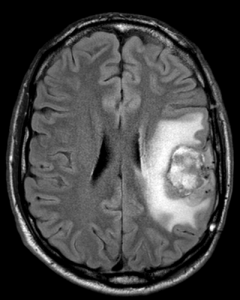

In [18]:
img

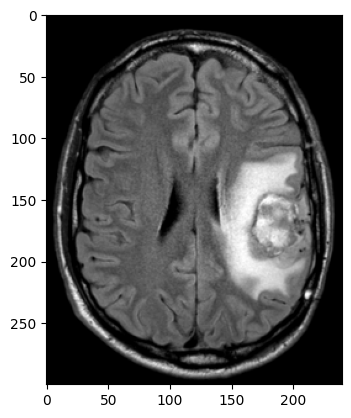

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ruta=extract_path+'/'+ imagenes[1]
img_bc = cv2.imread(ruta)

plt.figure()
plt.imshow(img_bc)
plt.show()

In [30]:
img_bc.shape

(300, 240, 3)

#Escala de grises

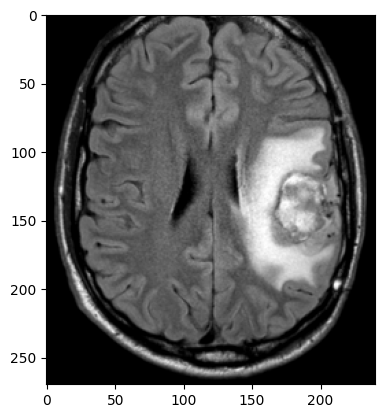

In [31]:
img_bc_gray = cv2.cvtColor(img_bc, cv2.COLOR_BGR2GRAY)
img_bc_cropped = img_bc_gray[
    30:2369 // 7 * 6, # alto
    0:1770 // 3 + 50 # ancho
    ]
plt.imshow(img_bc_cropped, cmap='gray')

#Histograma

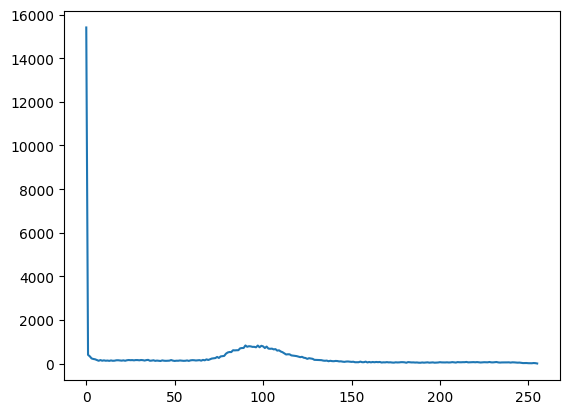

In [32]:
import os

# Calculamos el histograma de la imagen
hist_binary = cv2.calcHist([img_bc_cropped], [0], None, [256], [0, 256])
plt.plot(hist_binary)

#Extrae las detalles más caracterisicas

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
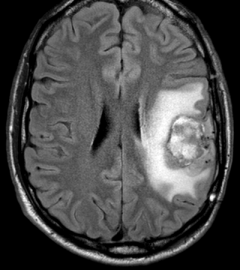

In [33]:
img_bc_cropped

In [34]:
img_bc_cropped[(img_bc_cropped > 50) & (img_bc_cropped < 150)]

array([ 87, 127, 131, ...,  57,  56,  53], dtype=uint8)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
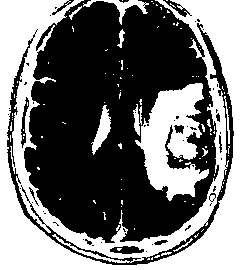

In [35]:
# Pixeles entre 50 y 150
bc_range = (img_bc_cropped > 50) & (img_bc_cropped < 150)
negros = img_bc_cropped < 20
bc_range
# Convertir booleanos a enteros
bc_range = 1 * bc_range

bc_range = np.where((bc_range==0)|(bc_range==1), bc_range ^ 1, bc_range)
bc_range = 255 * bc_range
# Es importante convertir los valores a uint8 (que es el formato usado para las imágenes
# por OpenCV)
# https://stackoverflow.com/a/46689933/25293154
bc_range = bc_range.astype(np.uint8)
bc_range

#Imagen en negro

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
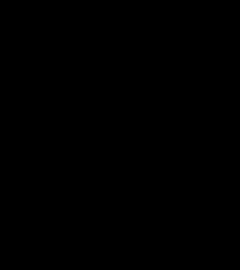

In [36]:
# Crear una imagen en negro con el mismo tamaño
zeros = np.zeros(bc_range.shape, dtype="uint8")
zeros

#Imagen en rojo

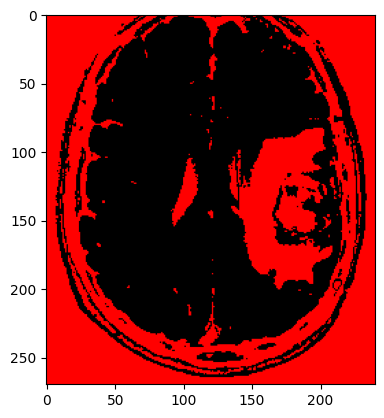

In [37]:
# Crear imágenes para cada canal de color
img_red = cv2.merge([bc_range, zeros, zeros])
plt.imshow(img_red, cmap='gray')

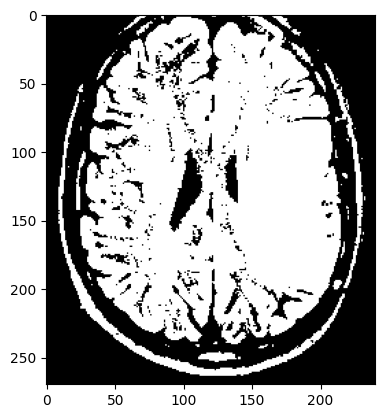

In [38]:
ret,thresh3 = cv2.threshold(img_bc_cropped,80,81,cv2.THRESH_BINARY)
plt.imshow(thresh3, cmap='gray')

#Reducir ruido

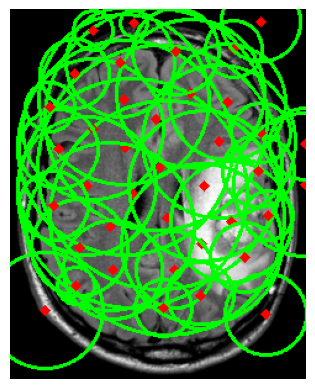

In [41]:
# Aplicar desenfoque para reducir ruido
gris = cv2.medianBlur(img_bc_cropped, 5)

# Detectar círculos usando la Transformada de Hough
circulos = cv2.HoughCircles(gris, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                            param1=50, param2=30, minRadius=5, maxRadius=100)

# Si encontró círculos, dibujarlos
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for i in circulos[0, :]:
        # Dibujar el círculo
        cv2.circle(img_bc, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Dibujar el centro del círculo
        cv2.circle(img_bc, (i[0], i[1]), 2, (0, 0, 255), 3)

# Mostrar imagen con círculos detectados
plt.imshow(cv2.cvtColor(img_bc, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


#Extraer área blanca

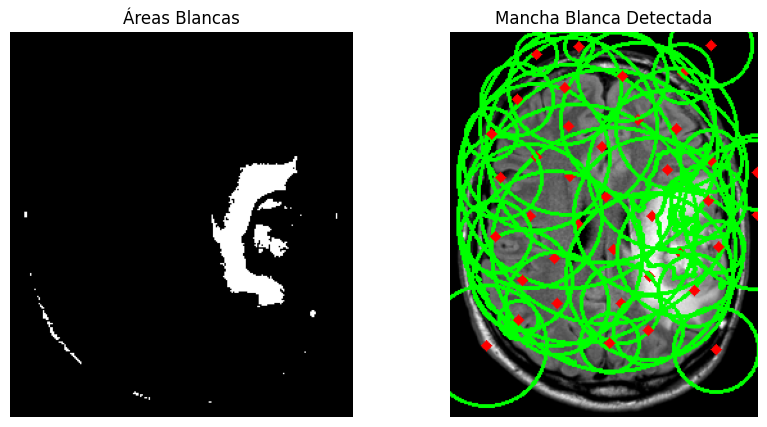

In [47]:
# Aplicar desenfoque para reducir ruido
#gris = cv2.medianBlur(img_bc_cropped, 5)

gris=img_bc_cropped
# Aplicar umbralización para detectar áreas blancas
_, thresholded = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY)

# Encontrar contornos de las regiones blancas detectadas
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos sobre la imagen original
highlighted_image = img_bc.copy()
cv2.drawContours(highlighted_image, contours, -1, (0, 255, 0), 2)

# Mostrar los resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(thresholded, cmap="gray")
axes[0].set_title("Áreas Blancas")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Mancha Blanca Detectada")
axes[1].axis("off")

plt.show()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
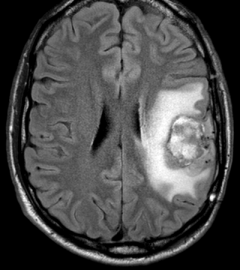

In [46]:
img_bc_cropped